import libraries
dataset from https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/data

In [604]:
import pandas as pd
import seaborn as sns

In [605]:
df = pd.read_csv('data/TWO_CENTURIES_OF_UM_RACES.csv', low_memory=False)

In [606]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [607]:
df.shape

(7461195, 13)

In [608]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [609]:
# cleanup data

In [610]:
# only want KAZ races, over 2010 year

In [611]:
df2 = df[(df['Year of event'] >= 2010) & (df['Event name'].str.contains('KAZ'))]

In [612]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
312803,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,6:25:34 h,NaN,RUS,1983.0,M,M23,10.893,151462
312804,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,6:47:59 h,NaN,HUN,1988.0,M,M23,10.295,214512
312805,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,7:17:06 h,NaN,RUS,1990.0,F,W23,9.609,214513
312806,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,7:20:15 h,NaN,ESP,1981.0,M,M35,9.54,109970
312807,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,7:32:55 h,NaN,KAZ,1986.0,M,M23,9.273,214514
312808,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,7:33:17 h,NaN,KAZ,1980.0,M,M35,9.266,57687
312809,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,7:51:37 h,NaN,KAZ,1991.0,M,M23,8.906,214515
312810,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,7:58:01 h,NaN,KAZ,1985.0,M,M23,8.786,214516
312811,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,8:04:49 h,NaN,KAZ,1967.0,M,M50,8.663,214517
312812,2018,07.05.2018,Tengri Ultra (KAZ),70km,64,8:14:51 h,NaN,KAZ,1994.0,M,M23,8.487,214518


In [613]:
df2.shape

(796, 13)

In [614]:
def remove_country_code(value) -> str:
    return value.replace(" (KAZ)", "")

In [615]:
#remove KAZ from event name
df2['Event name'] = df2['Event name'].apply(remove_country_code)

C:\Users\kaide\AppData\Local\Temp\ipykernel_8424\1541494348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].apply(remove_country_code)


In [616]:
def remove_h_letter(value) -> str:
    return value.replace(" h", "")

df2['Athlete performance'] = df2['Athlete performance'].apply(remove_h_letter)

C:\Users\kaide\AppData\Local\Temp\ipykernel_8424\2426776339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].apply(remove_h_letter)


In [617]:
df2 = df2[df2['Athlete year of birth'].notna()]  # delete all NaN year of birth rows
df2['Athlete age'] = df2['Year of event'] - df2['Athlete year of birth'].astype(int)  # Get age of athlete

In [618]:
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)

In [619]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
312803,2018,07.05.2018,Tengri Ultra,70km,64,6:25:34,M,10.893,151462,35
312804,2018,07.05.2018,Tengri Ultra,70km,64,6:47:59,M,10.295,214512,30
312805,2018,07.05.2018,Tengri Ultra,70km,64,7:17:06,F,9.609,214513,28
312806,2018,07.05.2018,Tengri Ultra,70km,64,7:20:15,M,9.54,109970,37
312807,2018,07.05.2018,Tengri Ultra,70km,64,7:32:55,M,9.273,214514,32
312808,2018,07.05.2018,Tengri Ultra,70km,64,7:33:17,M,9.266,57687,38
312809,2018,07.05.2018,Tengri Ultra,70km,64,7:51:37,M,8.906,214515,27
312810,2018,07.05.2018,Tengri Ultra,70km,64,7:58:01,M,8.786,214516,33
312811,2018,07.05.2018,Tengri Ultra,70km,64,8:04:49,M,8.663,214517,51
312812,2018,07.05.2018,Tengri Ultra,70km,64,8:14:51,M,8.487,214518,24


In [620]:
# clean up null values

In [621]:
df2.isna().sum()  # no null values

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Athlete age                  0
dtype: int64

In [622]:
# check for duplicates

In [623]:
df2[df2.duplicated() == True]  # no duplicates

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age


In [624]:
# reset index

In [625]:
df2 = df2.reset_index(drop=True)

In [626]:
df2.dtypes

Year of event                 int64
Event dates                  object
Event name                   object
Event distance/length        object
Event number of finishers     int64
Athlete performance          object
Athlete gender               object
Athlete average speed        object
Athlete ID                    int64
Athlete age                   int64
dtype: object

In [627]:
# Check how many races was in miles, not kilometers
df2[df2['Event distance/length'] == '50mi'].shape[0]    

0

In [628]:
# Remove km postfix in distance/length
df2['Event distance/length'] = df2['Event distance/length'].str.split('k').str.get(0)

In [629]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2018,07.05.2018,Tengri Ultra,70,64,6:25:34,M,10.893,151462,35
1,2018,07.05.2018,Tengri Ultra,70,64,6:47:59,M,10.295,214512,30
2,2018,07.05.2018,Tengri Ultra,70,64,7:17:06,F,9.609,214513,28
3,2018,07.05.2018,Tengri Ultra,70,64,7:20:15,M,9.54,109970,37
4,2018,07.05.2018,Tengri Ultra,70,64,7:32:55,M,9.273,214514,32
5,2018,07.05.2018,Tengri Ultra,70,64,7:33:17,M,9.266,57687,38
6,2018,07.05.2018,Tengri Ultra,70,64,7:51:37,M,8.906,214515,27
7,2018,07.05.2018,Tengri Ultra,70,64,7:58:01,M,8.786,214516,33
8,2018,07.05.2018,Tengri Ultra,70,64,8:04:49,M,8.663,214517,51
9,2018,07.05.2018,Tengri Ultra,70,64,8:14:51,M,8.487,214518,24


In [630]:
df2 = df2[df2['Event distance/length'].isin(['50', '70', '52.3'])]

In [631]:
df2['Athlete age'] = df2['Athlete age'].astype(int)
df2['Event name'] = df2['Event name'].astype(str)
df2['Event distance/length'] = df2['Event distance/length'].astype(float)
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [632]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length        float64
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Athlete age                    int32
dtype: object

In [633]:
df2.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2018,07.05.2018,Tengri Ultra,70.0,64,6:25:34,M,10.893,151462,35
1,2018,07.05.2018,Tengri Ultra,70.0,64,6:47:59,M,10.295,214512,30
2,2018,07.05.2018,Tengri Ultra,70.0,64,7:17:06,F,9.609,214513,28
3,2018,07.05.2018,Tengri Ultra,70.0,64,7:20:15,M,9.540,109970,37
4,2018,07.05.2018,Tengri Ultra,70.0,64,7:32:55,M,9.273,214514,32
5,2018,07.05.2018,Tengri Ultra,70.0,64,7:33:17,M,9.266,57687,38
6,2018,07.05.2018,Tengri Ultra,70.0,64,7:51:37,M,8.906,214515,27
7,2018,07.05.2018,Tengri Ultra,70.0,64,7:58:01,M,8.786,214516,33
8,2018,07.05.2018,Tengri Ultra,70.0,64,8:04:49,M,8.663,214517,51
9,2018,07.05.2018,Tengri Ultra,70.0,64,8:14:51,M,8.487,214518,24


In [634]:
df2 = df2.rename(columns={
        'Athlete average speed': 'speed',
        'Event distance/length': 'distance',
        'Athlete age': 'age',
        'Year of event': 'year',
        'Event name': 'name',
        'Event number of finishers': 'finishers',
        'Athlete performance': 'performance',
        'Athlete gender': 'gender',
        'Athlete ID': 'id',
        'Event dates': 'date'
    }
)

In [635]:
df2.dtypes

year             int64
date            object
name            object
distance       float64
finishers        int64
performance     object
gender          object
speed          float64
id               int64
age              int32
dtype: object

In [636]:
df2

,year,date,name,distance,finishers,performance,gender,speed,id,age
0,2018,07.05.2018,Tengri Ultra,70.0,64,6:25:34,M,10.893,151462,35
1,2018,07.05.2018,Tengri Ultra,70.0,64,6:47:59,M,10.295,214512,30
2,2018,07.05.2018,Tengri Ultra,70.0,64,7:17:06,F,9.609,214513,28
3,2018,07.05.2018,Tengri Ultra,70.0,64,7:20:15,M,9.540,109970,37
4,2018,07.05.2018,Tengri Ultra,70.0,64,7:32:55,M,9.273,214514,32
...,...,...,...,...,...,...,...,...,...,...
739,2015,09.05.2015,Tengri Ultra,52.3,35,10:05:28,M,5.183,1488767,30
740,2015,09.05.2015,Tengri Ultra,52.3,35,10:12:23,M,5.124,292798,29
741,2015,09.05.2015,Tengri Ultra,52.3,35,11:36:47,M,4.504,1488768,20
742,2015,09.05.2015,Tengri Ultra,52.3,35,11:36:49,F,4.503,1488769,33


In [637]:
df3 = df2[['date', 'name', 'distance', 'finishers', 'id', 'gender', 'speed', 'performance', 'age', 'year']]

In [638]:
df3.head(10)

,date,name,distance,finishers,id,gender,speed,performance,age,year
0,07.05.2018,Tengri Ultra,70.0,64,151462,M,10.893,6:25:34,35,2018
1,07.05.2018,Tengri Ultra,70.0,64,214512,M,10.295,6:47:59,30,2018
2,07.05.2018,Tengri Ultra,70.0,64,214513,F,9.609,7:17:06,28,2018
3,07.05.2018,Tengri Ultra,70.0,64,109970,M,9.540,7:20:15,37,2018
4,07.05.2018,Tengri Ultra,70.0,64,214514,M,9.273,7:32:55,32,2018
5,07.05.2018,Tengri Ultra,70.0,64,57687,M,9.266,7:33:17,38,2018
6,07.05.2018,Tengri Ultra,70.0,64,214515,M,8.906,7:51:37,27,2018
7,07.05.2018,Tengri Ultra,70.0,64,214516,M,8.786,7:58:01,33,2018
8,07.05.2018,Tengri Ultra,70.0,64,214517,M,8.663,8:04:49,51,2018
9,07.05.2018,Tengri Ultra,70.0,64,214518,M,8.487,8:14:51,24,2018


<Axes: xlabel='name', ylabel='Count'>

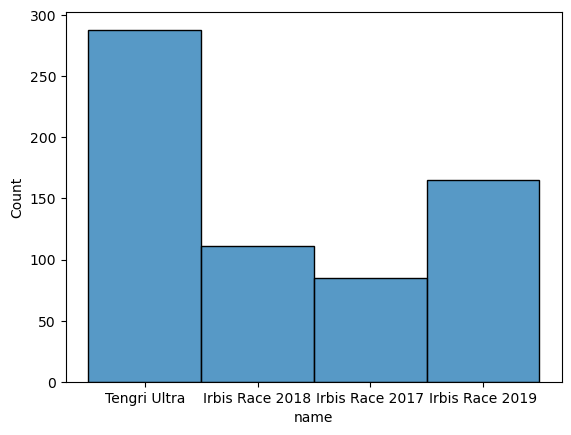

In [639]:
sns.histplot(df3['name'])  # marathons histogram

<Axes: xlabel='age', ylabel='Count'>

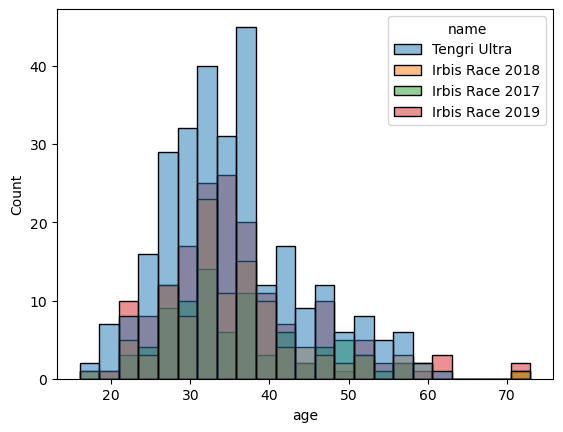

In [640]:
sns.histplot(df3, x='age', hue='name')  # gender stats histogram

<Axes: xlabel='speed', ylabel='Count'>

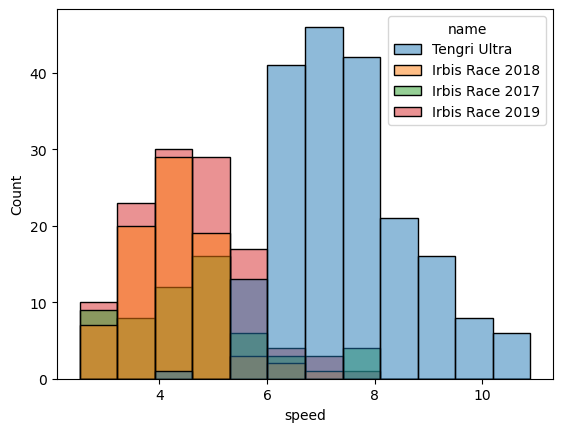

In [641]:
sns.histplot(df3[df3['age'] > 30], x='speed', hue='name')  # participants over 30 y.o. speed distogram

<Axes: xlabel='year', ylabel='Count'>

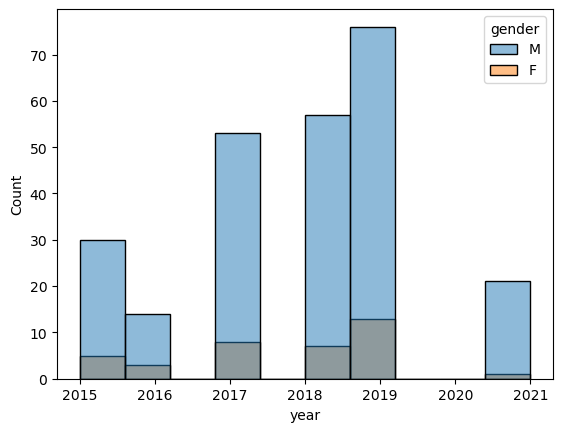

In [642]:
sns.histplot(df3[df3['name'] == 'Tengri Ultra'], x='year', hue='gender')

<Axes: xlabel='year', ylabel='Count'>

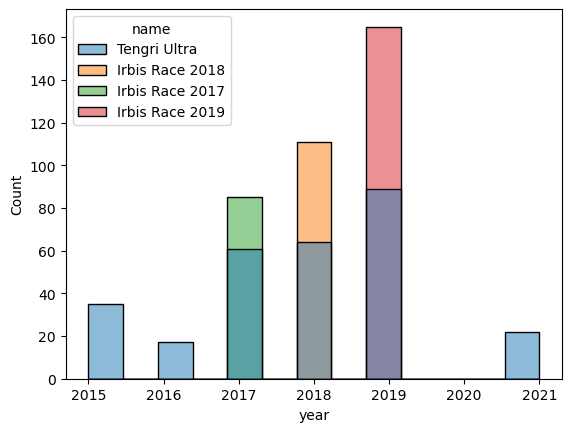

In [643]:
sns.histplot(df3, x='year', hue='name')

<Axes: xlabel='year', ylabel='count'>

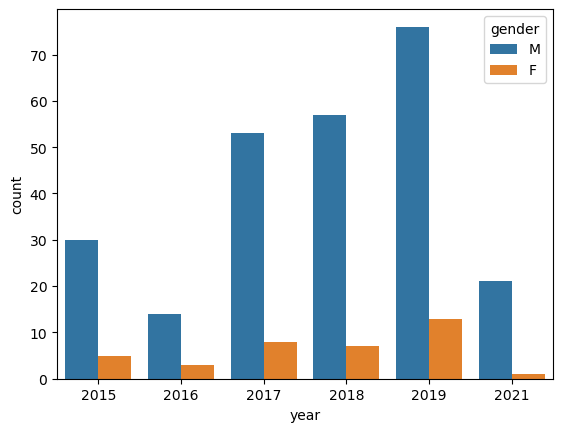

In [644]:
sns.countplot(df3[df3['name'] == 'Tengri Ultra'], x='year', hue='gender')

<Axes: xlabel='year', ylabel='speed'>

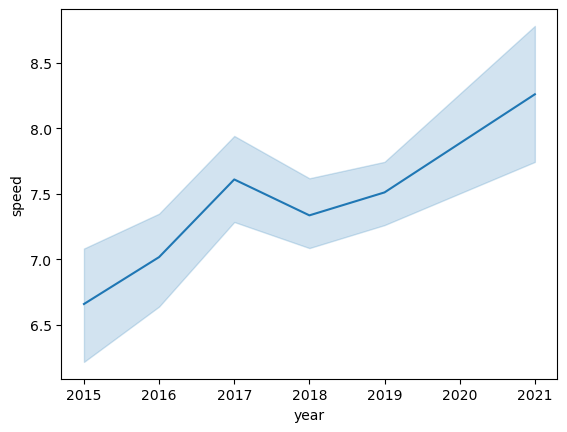

In [645]:
sns.lineplot(df3[df3['name'] == 'Tengri Ultra'], x='year', y='speed')

In [646]:
from collections import defaultdict

data = {}
for year in df3['year'].unique():
    data[year] = defaultdict(int)
for row in df3.iterrows():
    data[row[1]['year']]['speed'] += row[1]['speed']
    data[row[1]['year']]['count'] += 1

new_data = defaultdict(int)
for k, v in data.items():
    new_data[k] = v['speed'] / v['count']
new_data

defaultdict(int,
            {2018: 5.474051428571429,
             2016: 7.0176470588235285,
             2017: 5.925965753424659,
             2019: 5.643822834645675,
             2021: 8.260363636363637,
             2015: 6.659399999999999})

In [647]:
df5 = df3[(df3['name'] == 'Tengri Ultra') & (df3['gender'] == 'M')].groupby('year').mean('speed')
df6 = df3[(df3['name'] == 'Tengri Ultra') & (df3['gender'] == 'F')].groupby('year').mean('speed')

In [648]:
df5['gender'] = 'M'

In [649]:
df6['gender'] = 'F'

In [650]:
df7 = pd.concat([df5.drop(['finishers', 'id'], axis=1), df6.drop(['finishers', 'id'], axis=1)])

In [651]:
df7

,distance,speed,age,gender
year,,,,
2015,52.3,6.794333,34.633333,M
2016,70.0,7.036071,37.285714,M
2017,70.0,7.727094,35.943396,M
2018,70.0,7.356404,34.298246,M
2019,70.0,7.481250,35.881579,M
2021,70.0,8.307190,38.380952,M
2015,52.3,5.849800,28.600000,F
2016,70.0,6.931667,35.333333,F
2017,70.0,6.836500,34.500000,F


<Axes: xlabel='year', ylabel='speed'>

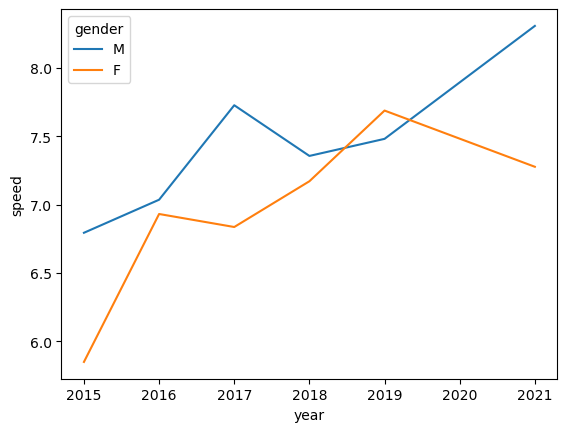

In [652]:
sns.lineplot(df7, x='year', y='speed', hue='gender')